=== 低エネルギー上位（候補の重なり） ===
 1. E=-4.800  x=1111  選択=['人Aと話す', '神社へ行く', '茶の体験に入る', '遠回りする']
 2. E=-3.700  x=1101  選択=['人Aと話す', '神社へ行く', '遠回りする']
 3. E=-3.600  x=1110  選択=['人Aと話す', '神社へ行く', '茶の体験に入る']
 4. E=-3.000  x=1100  選択=['人Aと話す', '神社へ行く']
 5. E=-2.800  x=0111  選択=['神社へ行く', '茶の体験に入る', '遠回りする']
 6. E=-2.500  x=1011  選択=['人Aと話す', '茶の体験に入る', '遠回りする']
 7. E=-2.100  x=1001  選択=['人Aと話す', '遠回りする']
 8. E=-1.900  x=0110  選択=['神社へ行く', '茶の体験に入る']


/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 12411 (\N{HIRAGANA LETTER HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 12393 (\N{HIRAGANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 32257 (\N{CJK UNIFIED IDEOGRAPH-7E01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3253904720.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu Sans.
  pl

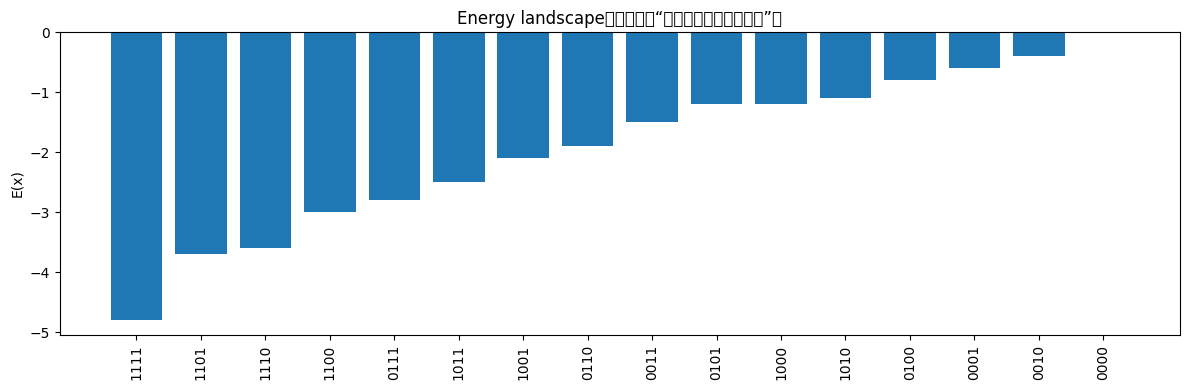

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31992 (\N{CJK UNIFIED IDEOGRAPH-7CF8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

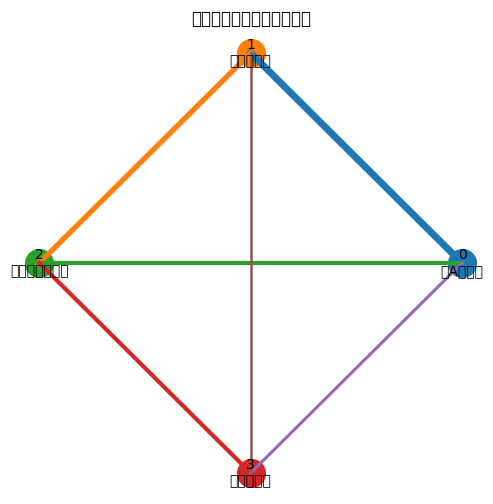


━━━━━━━━━━━━━━━━━━━━
　　量子おみくじ（Quantum Oracle）
━━━━━━━━━━━━━━━━━━━━
エネルギー： -4.800

選ばれた縁：
- 人Aと話す
- 神社へ行く

ことば：
「秋声／人Aと話す・神社へ行く」

次の一歩：
決めなくてよい。保留は、立派な選択である。
━━━━━━━━━━━━━━━━━━━━

※揺らぎ(T)を変えると、同じ問いでも“別の縁”が現れます。


In [ ]:
# =========================
# QUBO × 縁：最小デモ
# (c) minimal demo for Colab
# =========================

# --- 日本語フォント設定（Colab対応） ---
# Colab環境では日本語フォントをインストール（ローカル環境では警告が出るが実行には影響なし）
!apt-get -y install fonts-ipaexfont > /dev/null 2>&1

import itertools
import math
import random
from dataclasses import dataclass
from typing import Dict, Tuple, List

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# フォント設定（利用可能な日本語フォントを自動検出）
plt.rcParams["font.family"] = "IPAexGothic"
available_fonts = [f.name for f in fm.fontManager.ttflist]
if "IPAexGothic" not in available_fonts:
    # Windows環境などでIPAexGothicがない場合の代替
    for font_name in ["MS Gothic", "Yu Gothic", "Meiryo", "Takao", "IPAexGothic"]:
        if font_name in available_fonts:
            plt.rcParams["font.family"] = font_name
            break

# -------------------------
# 0) 体験側の「変数」定義（0/1）
# -------------------------
# x_i = 1 ならその選択を「採る」
VARIABLES = [
    "人Aと話す",      # x0
    "神社へ行く",     # x1
    "茶の体験に入る", # x2
    "遠回りする",     # x3
]

# -------------------------
# 1) QUBO（上三角）を定義
#    E(x)= Σ Qii*xi + Σ Qij*xi*xj (i<j)
#    ※値の解釈：負 → その選択/組合せを“招く”、正 → “抑える”
# -------------------------
# ここが②「縁のQUBO式」に相当（最小の象徴）
Q: Dict[Tuple[int,int], float] = {
    # 線形（その選択の“傾き”）
    (0,0): -1.2,   # 人Aと話す：少し惹かれている
    (1,1): -0.8,   # 神社：惹かれている
    (2,2): -0.4,   # 茶：少し惹かれている
    (3,3): -0.6,   # 遠回り：惹かれている

    # 相互作用（縁の“糸”）
    (0,1): -1.0,   # 人A × 神社：話が深まる縁（相乗）
    (1,2): -0.7,   # 神社 × 茶：儀式性の連結（相乗）
    (0,2): +0.5,   # 人A × 茶：同時だと情報過多になりがち（少し抑える）
    (2,3): -0.5,   # 茶 × 遠回り：余白が生まれる（相乗）
    (0,3): -0.3,   # 人A × 遠回り：寄り道が会話を開く（弱い相乗）
    (1,3): +0.2,   # 神社 × 遠回り：動きすぎると散る（少し抑える）
}

def qubo_energy(x: np.ndarray, Q: Dict[Tuple[int,int], float]) -> float:
    e = 0.0
    n = len(x)
    for i in range(n):
        e += Q.get((i,i), 0.0) * x[i]
    for i in range(n):
        for j in range(i+1, n):
            e += Q.get((i,j), 0.0) * x[i] * x[j]
    return float(e)

def bitstring(x: np.ndarray) -> str:
    return "".join(str(int(v)) for v in x)

# -------------------------
# 2) 全探索で解く（最小デモなので2^4=16通り）
# -------------------------
n = len(VARIABLES)
all_x = []
for bits in itertools.product([0,1], repeat=n):
    x = np.array(bits, dtype=int)
    e = qubo_energy(x, Q)
    all_x.append((e, x))

all_x.sort(key=lambda t: t[0])  # 低エネルギーほど“縁が結ばれやすい”

print("=== 低エネルギー上位（候補の重なり） ===")
for rank, (e, x) in enumerate(all_x[:8], start=1):
    picks = [VARIABLES[i] for i,v in enumerate(x) if v==1]
    print(f"{rank:>2}. E={e:>6.3f}  x={bitstring(x)}  選択={picks if picks else ['（何もしない）']}")

# -------------------------
# 3) エネルギー地形を可視化（③の“途中”を見せる）
# -------------------------
labels = [bitstring(x) for _, x in all_x]
energies = [e for e, _ in all_x]

plt.figure(figsize=(12,4))
plt.bar(range(len(energies)), energies)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.title("Energy landscape（低いほど“縁が結ばれやすい候補”）")
plt.ylabel("E(x)")
plt.tight_layout()
plt.show()

# -------------------------
# 4) “縁のネットワーク”表示（③：空間で糸が見えるイメージ）
#    - ノード：選択肢
#    - エッジ：相互作用（|Qij|が強いほど線が太い）
# -------------------------
# 簡易レイアウト（円形配置）
theta = np.linspace(0, 2*np.pi, n, endpoint=False)
pos = {i: (math.cos(t), math.sin(t)) for i,t in enumerate(theta)}

plt.figure(figsize=(6,6))
# ノード
for i, name in enumerate(VARIABLES):
    x0, y0 = pos[i]
    plt.scatter([x0], [y0], s=400)
    plt.text(x0, y0, f"{i}\n{name}", ha="center", va="center")

# エッジ（相互作用項だけ）
for (i,j), w in Q.items():
    if i == j:
        continue
    x1,y1 = pos[i]
    x2,y2 = pos[j]
    lw = 1.0 + 4.0 * min(1.0, abs(w)/1.0)  # 太さだけで強さを表現（色は固定しない）
    plt.plot([x1,x2], [y1,y2], linewidth=lw)

plt.axis("off")
plt.title("縁の糸（相互作用の構造）")
plt.show()

# -------------------------
# 5) 量子おみくじ（低エネルギー帯から“揺らぎ”で選ぶ）
#    - 物理の厳密性より「体験の演出」を優先
# -------------------------
def boltzmann_sample(candidates: List[Tuple[float, np.ndarray]], T: float = 0.35) -> Tuple[float, np.ndarray]:
    # Tが小さいほど最小エネルギー寄り、大きいほど“偶然性”が増える
    es = np.array([e for e,_ in candidates], dtype=float)
    # 数値安定化：最小値を引く
    es0 = es - es.min()
    weights = np.exp(-es0 / max(T, 1e-9))
    weights = weights / weights.sum()
    idx = np.random.choice(len(candidates), p=weights)
    return candidates[idx]

SEASONS = ["薄氷", "立春", "春霞", "若葉", "夕立", "秋声", "木枯らし", "雪明り"]
NEXT_STEPS = [
    "一つだけ、今日やることを減らしなさい。",
    "遠回りを選びなさい。答えは道の途中にある。",
    "話すなら“結論”より“気配”を渡しなさい。",
    "決めなくてよい。保留は、立派な選択である。",
    "境界（しきい）を越えるのは、静かな一歩でよい。"
]

def render_omikuji(e: float, x: np.ndarray) -> str:
    picks = [VARIABLES[i] for i,v in enumerate(x) if v==1]
    if not picks:
        picks = ["（今日は“動かない”が縁）"]
    season = random.choice(SEASONS)
    hint = random.choice(NEXT_STEPS)
    poem = f"{season}／" + "・".join(picks[:2])  # 俳句“風”に短く
    card = f"""
━━━━━━━━━━━━━━━━━━━━
　　量子おみくじ（Quantum Oracle）
━━━━━━━━━━━━━━━━━━━━
エネルギー： {e:.3f}

選ばれた縁：
- {picks[0]}
{("- " + picks[1]) if len(picks) > 1 else ""}

ことば：
「{poem}」

次の一歩：
{hint}
━━━━━━━━━━━━━━━━━━━━
"""
    return card

# 低エネルギー上位だけを“神託候補”に（例：上位6）
oracle_pool = all_x[:6]
e_pick, x_pick = boltzmann_sample(oracle_pool, T=0.45)  # ここで“揺らぎ”を調整
print(render_omikuji(e_pick, x_pick))

print("※揺らぎ(T)を変えると、同じ問いでも“別の縁”が現れます。")


今日の悩み・気持ちを一文でどうぞ（例：疲れていて決断ができない…）：
> 眠い。休みたい。



--- 推定された“心の傾き”（0〜1） ---
疲れ=0.50  不安/焦り=0.00  好奇心=0.00  孤独=0.00  決断=0.00

=== 低エネルギー候補（重ね合わせ）Top3 ===
1. E=-2.800  x=1111  選択=['人Aと話す', '神社へ行く', '茶の体験に入る', '遠回りする']
2. E=-2.350  x=1101  選択=['人Aと話す', '神社へ行く', '遠回りする']
3. E=-2.100  x=1100  選択=['人Aと話す', '神社へ行く']

━━━━━━━━━━━━━━━━━━━━
　　量子おみくじ（Quantum Oracle）
━━━━━━━━━━━━━━━━━━━━
エネルギー： -2.800

選ばれた縁：
- 人Aと話す
- 神社へ行く

ことば：
「夕立／人Aと話す・神社へ行く」

次の一歩：
一つだけ、今日やることを減らしなさい。
━━━━━━━━━━━━━━━━━━━━

※揺らぎ(T)=0.45（大きいほど偶然性が増えます）


/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 12411 (\N{HIRAGANA LETTER HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 12393 (\N{HIRAGANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 32257 (\N{CJK UNIFIED IDEOGRAPH-7E01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3757531109.py:241: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu San

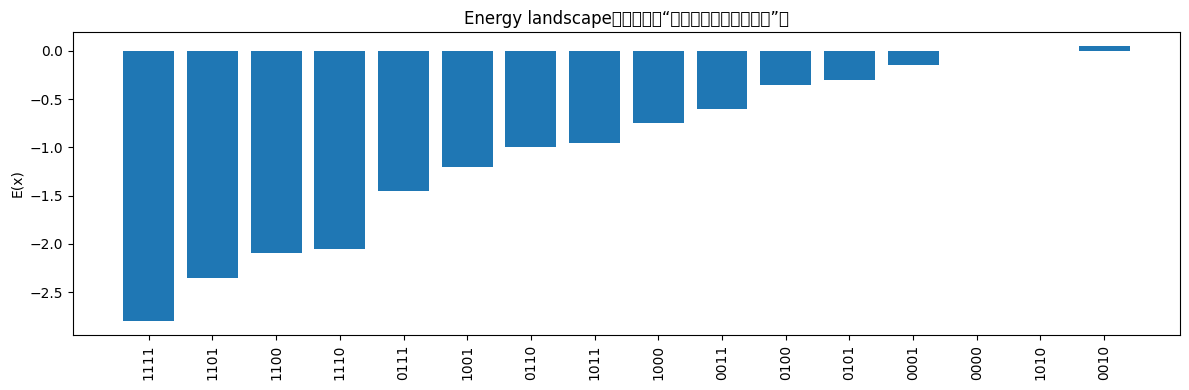

In [ ]:
# ============================================================
# 量子神託（最小プロトタイプ）: 悩み入力 → QUBO生成 → 候補提示 → おみくじ
# Colabでそのまま実行OK
# ============================================================

# --- 日本語フォント（警告回避） ---
!apt-get -y install fonts-ipaexfont > /dev/null
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "IPAexGothic"

import itertools, math, random, re
from typing import Dict, Tuple, List
import numpy as np

# -------------------------
# 1) 変数（最小）
# -------------------------
VARIABLES = [
    "人Aと話す",      # x0
    "神社へ行く",     # x1
    "茶の体験に入る", # x2
    "遠回りする",     # x3
]

# -------------------------
# 2) ベースQUBO（上三角）
# -------------------------
Q_BASE: Dict[Tuple[int,int], float] = {
    (0,0): -1.2,
    (1,1): -0.8,
    (2,2): -0.4,
    (3,3): -0.6,
    (0,1): -1.0,
    (1,2): -0.7,
    (0,2): +0.5,
    (2,3): -0.5,
    (0,3): -0.3,
    (1,3): +0.2,
}

def qubo_energy(x: np.ndarray, Q: Dict[Tuple[int,int], float]) -> float:
    e = 0.0
    n = len(x)
    for i in range(n):
        e += Q.get((i,i), 0.0) * x[i]
    for i in range(n):
        for j in range(i+1, n):
            e += Q.get((i,j), 0.0) * x[i] * x[j]
    return float(e)

def bitstring(x: np.ndarray) -> str:
    return "".join(str(int(v)) for v in x)

# -------------------------
# 3) 悩み文 → “心の傾き” を推定（最小ルール）
# -------------------------
@dataclass
class Mood:
    fatigue: float      # 疲れ
    anxiety: float      # 不安・焦り
    curiosity: float    # 好奇心・前向き
    loneliness: float   # 孤独感
    decisiveness: float # 決断したい

from dataclasses import dataclass

KEYWORDS = {
    "fatigue":      ["疲", "しんど", "眠", "だる", "消耗", "限界", "体調"],
    "anxiety":      ["不安", "焦", "怖", "心配", "迷", "落ち着か", "緊張"],
    "curiosity":    ["やってみ", "興味", "面白", "学び", "試", "挑戦", "ワクワク"],
    "loneliness":   ["孤独", "一人", "寂", "誰にも", "分かって", "話せ"],
    "decisiveness": ["決め", "結論", "選", "判断", "断", "方針", "期限"],
}

def score_from_text(text: str, keys: List[str]) -> float:
    # “含まれる数”で雑に強度推定（最小版）
    s = 0
    for k in keys:
        s += len(re.findall(re.escape(k), text))
    return float(s)

def infer_mood(text: str) -> Mood:
    t = text.strip()
    raw = {k: score_from_text(t, v) for k, v in KEYWORDS.items()}
    # 0〜1に正規化（上限3くらいを想定して潰す）
    def norm(x: float) -> float:
        return max(0.0, min(1.0, x / 2.0))
    return Mood(
        fatigue=norm(raw["fatigue"]),
        anxiety=norm(raw["anxiety"]),
        curiosity=norm(raw["curiosity"]),
        loneliness=norm(raw["loneliness"]),
        decisiveness=norm(raw["decisiveness"]),
    )

# -------------------------
# 4) Mood → QUBO調整（“縁の地形”をその日仕様にする）
# -------------------------
def clamp(v: float, lo: float=-3.0, hi: float=3.0) -> float:
    return max(lo, min(hi, v))

def build_qubo_from_mood(m: Mood) -> Dict[Tuple[int,int], float]:
    Q = dict(Q_BASE)  # copy

    # 直感的な設計（最小）
    # - 疲れ：行動しすぎを抑える（行動数にペナルティ）
    # - 不安：人に会う/儀式（神社）を少し強める
    # - 好奇心：茶・遠回りを強める（探索）
    # - 孤独：人Aを強める（縁）
    # - 決断：神社（区切り）や人A（相談）を強め、揺らぎを少し減らす（※温度で対応）

    # 線形項の調整
    Q[(0,0)] = clamp(Q[(0,0)] - 0.9*m.loneliness - 0.5*m.anxiety - 0.3*m.decisiveness)  # 人A
    Q[(1,1)] = clamp(Q[(1,1)] - 0.6*m.anxiety   - 0.4*m.decisiveness)                    # 神社
    Q[(2,2)] = clamp(Q[(2,2)] - 0.8*m.curiosity)                                          # 茶
    Q[(3,3)] = clamp(Q[(3,3)] - 0.7*m.curiosity)                                          # 遠回り

    # 相互作用（縁の糸）も少し動かす
    Q[(0,1)] = clamp(Q[(0,1)] - 0.4*m.decisiveness)  # 相談×区切り
    Q[(1,2)] = clamp(Q[(1,2)] - 0.3*m.curiosity)     # 儀式×体験
    Q[(2,3)] = clamp(Q[(2,3)] - 0.2*m.curiosity)     # 余白×探索

    # 疲れ：行動数ペナルティ（Σ xi を抑える = +λ Σ xi）
    # 既存の線形に + を足して「動きすぎ」を抑える
    fatigue_pen = 0.9 * m.fatigue
    for i in range(4):
        Q[(i,i)] = clamp(Q[(i,i)] + fatigue_pen)

    # 疲れが強い時は「人A×茶（情報過多）」を少し強く抑える
    Q[(0,2)] = clamp(Q[(0,2)] + 0.4*m.fatigue)

    return Q

# -------------------------
# 5) 解探索（全探索）
# -------------------------
def solve_all(Q: Dict[Tuple[int,int], float]) -> List[Tuple[float, np.ndarray]]:
    n = len(VARIABLES)
    sols = []
    for bits in itertools.product([0,1], repeat=n):
        x = np.array(bits, dtype=int)
        e = qubo_energy(x, Q)
        sols.append((e, x))
    sols.sort(key=lambda t: t[0])
    return sols

# -------------------------
# 6) “神託”の提示（候補3つ + おみくじ1つ）
# -------------------------
SEASONS = ["薄氷", "立春", "春霞", "若葉", "夕立", "秋声", "木枯らし", "雪明り"]
NEXT_STEPS = [
    "一つだけ、今日やることを減らしなさい。",
    "遠回りを選びなさい。答えは道の途中にある。",
    "話すなら“結論”より“気配”を渡しなさい。",
    "決めなくてよい。保留は、立派な選択である。",
    "境界（しきい）を越えるのは、静かな一歩でよい。"
]

def boltzmann_sample(cands: List[Tuple[float, np.ndarray]], T: float) -> Tuple[float, np.ndarray]:
    es = np.array([e for e,_ in cands], dtype=float)
    es0 = es - es.min()
    weights = np.exp(-es0 / max(T, 1e-9))
    weights = weights / weights.sum()
    idx = np.random.choice(len(cands), p=weights)
    return cands[idx]

def picks_from_x(x: np.ndarray) -> List[str]:
    p = [VARIABLES[i] for i,v in enumerate(x) if v==1]
    return p if p else ["（今日は“動かない”が縁）"]

def oracle_card(e: float, x: np.ndarray) -> str:
    picks = picks_from_x(x)
    season = random.choice(SEASONS)
    hint = random.choice(NEXT_STEPS)
    poem = f"{season}／" + "・".join(picks[:2])
    lines = [
        "━━━━━━━━━━━━━━━━━━━━",
        "　　量子おみくじ（Quantum Oracle）",
        "━━━━━━━━━━━━━━━━━━━━",
        f"エネルギー： {e:.3f}",
        "",
        "選ばれた縁：",
        *[f"- {p}" for p in picks[:2]],
        "",
        "ことば：",
        f"「{poem}」",
        "",
        "次の一歩：",
        hint,
        "━━━━━━━━━━━━━━━━━━━━",
    ]
    return "\n".join(lines)

def suggest_top3(sols: List[Tuple[float, np.ndarray]]) -> str:
    out = ["\n=== 低エネルギー候補（重ね合わせ）Top3 ==="]
    for r, (e, x) in enumerate(sols[:3], start=1):
        out.append(f"{r}. E={e:.3f}  x={bitstring(x)}  選択={picks_from_x(x)}")
    return "\n".join(out)

def temperature_from_mood(m: Mood) -> float:
    # “揺らぎ”制御：不安・決断が強い→揺らぎ小さめ / 好奇心強い→揺らぎ大きめ
    T = 0.45
    T *= (1.0 + 0.35*m.curiosity)
    T *= (1.0 - 0.25*m.decisiveness)
    T *= (1.0 - 0.15*m.anxiety)
    return max(0.15, min(0.85, T))

# -------------------------
# 7) 実行：悩み入力 → 神託
# -------------------------
user_text = input("今日の悩み・気持ちを一文でどうぞ（例：疲れていて決断ができない…）：\n> ")

m = infer_mood(user_text)
Q_today = build_qubo_from_mood(m)
sols = solve_all(Q_today)

print("\n--- 推定された“心の傾き”（0〜1） ---")
print(f"疲れ={m.fatigue:.2f}  不安/焦り={m.anxiety:.2f}  好奇心={m.curiosity:.2f}  孤独={m.loneliness:.2f}  決断={m.decisiveness:.2f}")

print(suggest_top3(sols))

# おみくじは上位6から選ぶ（“神託候補帯”）
pool = sols[:6]
T = temperature_from_mood(m)
e_pick, x_pick = boltzmann_sample(pool, T=T)

print("\n" + oracle_card(e_pick, x_pick))
print(f"\n※揺らぎ(T)={T:.2f}（大きいほど偶然性が増えます）")

# -------------------------
# 8) 参考：エネルギー地形（任意）
# -------------------------
labels = [bitstring(x) for _, x in sols]
energies = [e for e,_ in sols]

plt.figure(figsize=(12,4))
plt.bar(range(len(energies)), energies)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.title("Energy landscape（低いほど“縁が結ばれやすい候補”）")
plt.ylabel("E(x)")
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# 「整い」を定義するQUBO設計（アート用）
# 最適化しないQUBO - エネルギー勾配を"感じさせる"
# ============================================================

# --- 日本語フォント設定（Colab対応） ---
# Colab環境では日本語フォントをインストール（ローカル環境では警告が出るが実行には影響なし）
!apt-get -y install fonts-ipaexfont > /dev/null 2>&1

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.animation import FuncAnimation
import time
import math
from typing import Dict, Tuple, List

# フォント設定（利用可能な日本語フォントを自動検出）
plt.rcParams["font.family"] = "IPAexGothic"
available_fonts = [f.name for f in fm.fontManager.ttflist]
if "IPAexGothic" not in available_fonts:
    # Windows環境などでIPAexGothicがない場合の代替
    for font_name in ["MS Gothic", "Yu Gothic", "Meiryo", "Takao", "IPAexGothic"]:
        if font_name in available_fonts:
            plt.rcParams["font.family"] = font_name
            break

# -------------------------
# 1) 内的状態の変数定義（人、行動、判断は一切出さない）
# -------------------------
# x_i ∈ {0,1} の意味：
# 0 = 抑えている
# 1 = 表に出ている
INNER_STATES = [
    "迷い",      # x0
    "焦り",      # x1
    "静けさ",    # x2
    "好奇心",    # x3
]

# -------------------------
# 2) 「整い」のQUBO設計
#    通常のQUBOとの違い：
#    - 最小エネルギー解を探さない
#    - エネルギー勾配を"感じさせる"
#    - 解が定まらない状態を維持
# -------------------------
Q_TADASHI: Dict[Tuple[int,int], float] = {
    # 線形項（各状態の"傾き"）
    (0,0): +0.3,   # 迷い：少し抑える傾向
    (1,1): +0.5,   # 焦り：抑える傾向
    (2,2): -0.8,   # 静けさ：表に出やすい（整流の核）
    (3,3): -0.2,   # 好奇心：少し表に出やすい
    
    # 相互作用項（"整流"の構造）
    # 同時に立ち過ぎると苦しい項
    (0,1): +1.2,   # 迷い × 焦り → ペナルティ（内的摩擦）
    
    # 片方だけ立つと尖る項
    (1,3): +0.6,   # 焦り × 好奇心 → 弱いペナルティ
    
    # 「静けさ」が他を緩和する項（整流）
    (2,0): -0.9,   # 静けさ × 迷い → 報酬（整流）
    (2,1): -1.0,   # 静けさ × 焦り → 報酬（整流）
    (2,3): -0.3,   # 静けさ × 好奇心 → 弱い報酬
    
    # その他の相互作用
    (0,3): +0.2,   # 迷い × 好奇心 → 弱いペナルティ
}

def qubo_energy_inner(x: np.ndarray, Q: Dict[Tuple[int,int], float]) -> float:
    """内的状態のQUBOエネルギー計算"""
    e = 0.0
    n = len(x)
    for i in range(n):
        e += Q.get((i,i), 0.0) * x[i]
    for i in range(n):
        for j in range(i+1, n):
            e += Q.get((i,j), 0.0) * x[i] * x[j]
    return float(e)

# -------------------------
# 3) エネルギー勾配の計算（"整い"の指標）
# -------------------------
def energy_gradient(Q: Dict[Tuple[int,int], float]) -> float:
    """全状態の平均エネルギー勾配を計算"""
    n = len(INNER_STATES)
    energies = []
    for bits in [(0,0,0,0), (1,0,0,0), (0,1,0,0), (0,0,1,0), (0,0,0,1),
                 (1,1,0,0), (0,1,1,0), (0,0,1,1), (1,0,0,1),
                 (1,1,1,0), (0,1,1,1), (1,0,1,1), (1,1,0,1),
                 (1,1,1,1)]:
        x = np.array(bits, dtype=float)
        e = qubo_energy_inner(x, Q)
        energies.append(e)
    
    if len(energies) < 2:
        return 1.0
    
    # エネルギー分布の分散を勾配として使用
    mean_e = np.mean(energies)
    var_e = np.var(energies)
    
    # 勾配が小さい = 整っている
    gradient = var_e / (abs(mean_e) + 1.0)
    return gradient

# -------------------------
# 4) 先人の言葉（エネルギー勾配が一定以下になったとき出現）
# -------------------------
WISDOM_WORDS = [
    "水は、争わない",
    "止まることで、流れが見える",
    "無為にして為す",
    "動くことが静である",
    "間こそが答えである",
]

def should_show_wisdom(gradient: float, threshold: float = 0.3) -> bool:
    """エネルギー勾配が閾値以下の場合、先人の言葉を表示"""
    return gradient <= threshold

# -------------------------
# 5) アート的視覚化（単語が浮かび、近づいたり離れたり）
# -------------------------
class WordVisualization:
    def __init__(self):
        self.fig, self.ax = plt.subplots(figsize=(12, 8), facecolor='#0a0a1a')
        self.ax.set_facecolor('#0a0a1a')
        self.ax.set_xlim(-2, 2)
        self.ax.set_ylim(-2, 2)
        self.ax.axis('off')
        
        # ノード位置（時間とともに変化）
        self.positions = {i: (0.0, 0.0) for i in range(len(INNER_STATES))}
        self.velocities = {i: (0.0, 0.0) for i in range(len(INNER_STATES))}
        
        # アニメーション用
        self.current_state = np.array([0.5, 0.5, 0.5, 0.5])  # 0~1の連続値
        self.time = 0.0
        self.wisdom_shown = False
        self.wisdom_text = None
        
        # 脈拍（擬似）
        self.pulse_bpm = 72.0
        
    def update_positions(self, dt: float = 0.05):
        """QUBOエネルギーに基づいて位置を更新"""
        self.time += dt
        
        # ボルツマン分布で現在の状態を更新（温度で揺らぎを保つ）
        T = 0.5  # 常に揺らぎを残す
        all_states = []
        all_energies = []
        
        for i in range(16):  # 2^4 = 16通り
            bits = [(i >> j) & 1 for j in range(4)]
            x = np.array(bits, dtype=float)
            e = qubo_energy_inner(x, Q_TADASHI)
            all_states.append(x)
            all_energies.append(e)
        
        # ボルツマン分布でサンプリング（揺らぎを保つ）
        energies = np.array(all_energies)
        energies_norm = energies - energies.min()
        weights = np.exp(-energies_norm / T)
        weights = weights / weights.sum()
        
        # 確率的に状態を選択（収束しない）
        idx = np.random.choice(len(all_states), p=weights)
        target_state = all_states[idx]
        
        # スムーズに遷移（収束しないように）
        alpha = 0.1  # 緩やかな遷移
        self.current_state = alpha * target_state + (1 - alpha) * self.current_state
        
        # エネルギーに基づいてノード間距離を計算
        for i in range(len(INNER_STATES)):
            # 円形配置の基本位置
            angle = 2 * math.pi * i / len(INNER_STATES)
            base_x = math.cos(angle)
            base_y = math.sin(angle)
            
            # エネルギーに基づいて調整
            # 低エネルギー = 近づく、高エネルギー = 離れる
            for j in range(i+1, len(INNER_STATES)):
                # 相互作用項の強さ
                interaction = Q_TADASHI.get((i,j), 0.0)
                
                # 両方が表に出ている場合
                if self.current_state[i] > 0.5 and self.current_state[j] > 0.5:
                    if interaction < 0:  # 負 = 相乗効果 = 近づく
                        dist_factor = abs(interaction) * 0.3
                    else:  # 正 = ペナルティ = 離れる
                        dist_factor = -abs(interaction) * 0.3
                else:
                    dist_factor = 0
                
                # 位置を調整
                angle_j = 2 * math.pi * j / len(INNER_STATES)
                base_x_j = math.cos(angle_j)
                base_y_j = math.sin(angle_j)
                
                base_x += dist_factor * (base_x_j - base_x)
                base_y += dist_factor * (base_y_j - base_y)
            
            # 揺らぎを加える（脈拍のような）
            pulse = math.sin(self.time * self.pulse_bpm / 60.0 * 2 * math.pi) * 0.05
            
            self.positions[i] = (
                base_x + pulse,
                base_y + pulse
            )
    
    def draw_frame(self, frame):
        """アニメーションフレームを描画"""
        self.ax.clear()
        self.ax.set_facecolor('#0a0a1a')
        self.ax.set_xlim(-2.5, 2.5)
        self.ax.set_ylim(-2.5, 2.5)
        self.ax.axis('off')
        
        # 位置を更新
        self.update_positions()
        
        # ノードを描画
        for i, word in enumerate(INNER_STATES):
            x, y = self.positions[i]
            alpha = 0.5 + self.current_state[i] * 0.5  # 状態が強いほど明るく
            
            # ノード（円）
            self.ax.scatter([x], [y], s=800, alpha=alpha, 
                          color='#4a9eff', edgecolors='#ffffff', linewidths=2)
            
            # 単語ラベル
            self.ax.text(x, y, word, ha='center', va='center', 
                        fontsize=16, color='#ffffff', alpha=alpha, weight='bold')
        
        # エッジ（相互作用）を描画
        for (i, j), weight in Q_TADASHI.items():
            if i == j:
                continue
            
            x1, y1 = self.positions[i]
            x2, y2 = self.positions[j]
            
            # エネルギーに基づいて線の太さと透明度を決定
            if self.current_state[i] > 0.3 and self.current_state[j] > 0.3:
                line_alpha = 0.3 + abs(weight) * 0.3
                line_width = 1.0 + abs(weight) * 2.0
                
                if weight < 0:
                    color = '#4a9eff'  # 相乗効果（青）
                else:
                    color = '#ff6b6b'  # ペナルティ（赤）
                
                self.ax.plot([x1, x2], [y1, y2], 
                           color=color, alpha=line_alpha, linewidth=line_width)
        
        # エネルギー勾配を計算
        grad = energy_gradient(Q_TADASHI)
        
        # 先人の言葉を表示（エネルギー勾配が一定以下）
        if should_show_wisdom(grad) and not self.wisdom_shown:
            wisdom = np.random.choice(WISDOM_WORDS)
            self.wisdom_text = self.ax.text(0, -2.2, f"「{wisdom}」", 
                                          ha='center', va='center',
                                          fontsize=18, color='#ffd700', 
                                          alpha=0.8, style='italic', weight='bold')
            self.wisdom_shown = True
        elif self.wisdom_text is not None:
            # 数秒後に消える
            if frame > 0 and frame % 120 == 0:  # 約2秒後
                self.wisdom_text.remove()
                self.wisdom_text = None
                self.wisdom_shown = False
        
        # タイトル
        self.ax.text(0, 2.3, "整い", ha='center', va='center',
                    fontsize=24, color='#ffffff', weight='bold')
        
        # エネルギー勾配を表示
        self.ax.text(0, -2.5, f"エネルギー勾配: {grad:.3f}", 
                    ha='center', va='center',
                    fontsize=10, color='#888888', alpha=0.7)
        
        plt.tight_layout()

# -------------------------
# 6) アニメーション実行
# -------------------------
print("「整い」のQUBO視覚化を開始します...")
print("※ 最適解に収束せず、常に揺らいでいる状態を観察してください")
print()

# 視覚化オブジェクトを作成
viz = WordVisualization()

# アニメーション作成（100フレーム = 約5秒）
ani = FuncAnimation(viz.fig, viz.draw_frame, frames=100, 
                   interval=50, blit=False, repeat=True)

plt.show()

print("\n「整い」とは、解が定まらない状態で、")
print("エネルギー勾配が緩やかになることです。")
print("先人の言葉が現れた瞬間を観察してください。")

In [ ]:
# ============================================================
# QUBO × 量子神託 UI: 言葉のエネルギーで繋がる球体視覚化
# 入力した言葉の重要なワードを中心に、他の人の言葉がエネルギーで近づく
# ============================================================

# --- 日本語フォント設定（Colab対応） ---
# Colab環境では日本語フォントをインストール（ローカル環境では警告が出るが実行には影響なし）
!apt-get -y install fonts-ipaexfont > /dev/null 2>&1

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# フォント設定（利用可能な日本語フォントを自動検出）
plt.rcParams["font.family"] = "IPAexGothic"
available_fonts = [f.name for f in fm.fontManager.ttflist]
if "IPAexGothic" not in available_fonts:
    # Windows環境などでIPAexGothicがない場合の代替
    for font_name in ["MS Gothic", "Yu Gothic", "Meiryo", "Takao", "IPAexGothic"]:
        if font_name in available_fonts:
            plt.rcParams["font.family"] = font_name
            break

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import re
from typing import Dict, List, Tuple
from collections import Counter

# -------------------------
# 1) グローバルな単語データベース（他の人の言葉）
# -------------------------
GLOBAL_WORDS_DATABASE = [
    # 願い・目標
    "世界平和", "貢献", "成長", "学び", "挑戦", "夢", "希望", "未来",
    # 感情・状態
    "感謝", "愛", "幸せ", "喜び", "安心", "充実", "満足", "平和",
    # 行動・姿勢
    "努力", "継続", "忍耐", "誠実", "正直", "優しさ", "思いやり", "共感",
    # 哲学・概念
    "調和", "バランス", "自然", "美", "真実", "自由", "正義", "道",
    # 関係性
    "絆", "つながり", "家族", "友人", "仲間", "信頼", "尊敬", "協力",
    # 時間・流れ
    "今", "瞬間", "過程", "変化", "進化", "発展", "循環", "流れ",
    # 内的状態
    "静けさ", "集中", "覚悟", "決意", "勇気", "強さ", "柔軟性", "寛容",
]

# 有名な格言データベース
FAMOUS_QUOTES = [
    {"keywords": ["平和", "世界", "貢献", "希望"], 
     "quote": "雪の下で種は春を待っている。焦るべからず、時満ちるを待て。"},
    {"keywords": ["成長", "努力", "継続", "挑戦"], 
     "quote": "千里の道も一歩から。歩みを止めず、続けることに意味がある。"},
    {"keywords": ["感謝", "愛", "絆", "つながり"], 
     "quote": "一期一会。今この瞬間を大切に。すべては縁で繋がっている。"},
    {"keywords": ["自然", "調和", "バランス", "流れ"], 
     "quote": "水は、争わない。形にこだわらず、流れるがままに。"},
    {"keywords": ["静けさ", "集中", "今", "瞬間"], 
     "quote": "止まることで、流れが見える。動の中に静がある。"},
    {"keywords": ["勇気", "決意", "挑戦", "道"], 
     "quote": "道が分れていたら、念がない方へ行け。―柳のことば"},
    {"keywords": ["思いやり", "優しさ", "共感", "信頼"], 
     "quote": "人の心に寄り添う。それが真の強さである。"},
    {"keywords": ["変化", "進化", "発展", "未来"], 
     "quote": "無為にして為す。動くことが静である。"},
    {"keywords": ["美", "真実", "自然", "調和"], 
     "quote": "間こそが答えである。余白にこそ本質がある。"},
    {"keywords": ["自由", "正義", "道", "誠実"], 
     "quote": "己に誠実であること。それが自由への道である。"},
]

# -------------------------
# 2) テキストからキーワードを抽出
# -------------------------
def extract_keywords(text: str, top_n: int = 5) -> List[str]:
    """テキストから重要なキーワードを抽出"""
    # 日本語の単語を抽出（簡易版）
    # 実際のプロダクションでは、MeCabやJanomeなどの形態素解析器を使用
    
    # 数字、記号を除去
    text_clean = re.sub(r'[0-9０-９\W]+', ' ', text)
    
    # データベースの単語でマッチング
    found_keywords = []
    for word in GLOBAL_WORDS_DATABASE:
        if word in text_clean:
            found_keywords.append(word)
    
    # 見つからなかった場合、文字列をそのまま使用
    if not found_keywords:
        # 長めの文字列をキーワードとして使用
        words = text_clean.split()
        found_keywords = [w for w in words if len(w) >= 2][:top_n]
    
    return found_keywords[:top_n]

# -------------------------
# 3) キーワード間のQUBOエネルギーを計算
# -------------------------
def calculate_energy_between_words(word1: str, word2: str) -> float:
    """2つの言葉間のQUBOエネルギー（類似度の逆）を計算"""
    # 意味的類似度をシミュレート（実際にはWord2VecやBERTを使用）
    # ここでは簡易的に文字列の類似度と共通キーワードで近似
    
    energy = 0.0
    
    # 文字列の共通部分
    common_chars = set(word1) & set(word2)
    if common_chars:
        energy -= len(common_chars) * 0.3
    
    # 意味カテゴリによる補正（簡易版）
    categories = {
        "願い": ["世界平和", "貢献", "成長", "夢", "希望"],
        "感情": ["感謝", "愛", "幸せ", "喜び", "安心"],
        "行動": ["努力", "継続", "忍耐", "誠実", "正直"],
        "哲学": ["調和", "バランス", "自然", "美", "道"],
        "関係": ["絆", "つながり", "家族", "友人", "信頼"],
        "内的": ["静けさ", "集中", "覚悟", "決意", "勇気"],
    }
    
    for category, words in categories.items():
        if word1 in words and word2 in words:
            energy -= 0.5  # 同じカテゴリなら近づく
    
    # ランダムな揺らぎを追加
    energy += np.random.normal(0, 0.1)
    
    return energy

def build_word_network(center_words: List[str], database: List[str], n_neighbors: int = 15) -> Dict:
    """中心語を中心とした単語ネットワークを構築"""
    # 中心語とデータベースの全ての語を結合
    all_words = list(set(center_words + database))
    
    # 各語の中心語とのエネルギーを計算
    word_energies = {}
    for word in all_words:
        if word in center_words:
            energy = -2.0  # 中心語は強く配置
        else:
            # 中心語との平均エネルギー
            energies = [calculate_energy_between_words(cw, word) for cw in center_words]
            energy = np.mean(energies)
        word_energies[word] = energy
    
    # エネルギー順にソート
    sorted_words = sorted(word_energies.items(), key=lambda x: x[1])
    
    # 中心語 + エネルギーの低い（近い）語を選択
    selected_words = center_words.copy()
    for word, energy in sorted_words:
        if word not in center_words and len(selected_words) < n_neighbors:
            selected_words.append(word)
    
    # ネットワーク構造を構築
    network = {
        'words': selected_words,
        'energies': {word: word_energies.get(word, 0) for word in selected_words},
        'edges': []
    }
    
    # エッジ（線）を生成（エネルギーが近い語同士）
    for i, word1 in enumerate(selected_words):
        for j, word2 in enumerate(selected_words[i+1:], start=i+1):
            energy = calculate_energy_between_words(word1, word2)
            if energy < -0.3:  # エネルギーの閾値
                network['edges'].append((i, j, energy))
    
    return network

# -------------------------
# 4) 3D球体上に配置
# -------------------------
def place_words_on_sphere(n_words: int, center_indices: List[int]) -> np.ndarray:
    """単語を3D球体上に配置（中心語を中央付近に）"""
    positions = np.zeros((n_words, 3))
    
    # 球面上に均等に配置（フィボナッチ球面サンプリング）
    golden_angle = np.pi * (3 - np.sqrt(5))
    
    for i in range(n_words):
        if i in center_indices:
            # 中心語は中央付近に配置
            r = 0.3 + np.random.rand() * 0.2
        else:
            # その他は球面上に
            r = 0.8 + np.random.rand() * 0.4
        
        theta = golden_angle * i
        y = 1 - (i / float(n_words - 1)) * 2
        radius_at_y = np.sqrt(1 - y * y)
        
        x = np.cos(theta) * radius_at_y * r
        z = np.sin(theta) * radius_at_y * r
        
        positions[i] = [x, y, z]
    
    return positions

# -------------------------
# 5) 適切な格言を選択
# -------------------------
def select_relevant_quote(keywords: List[str]) -> str:
    """キーワードに基づいて適切な格言を選択"""
    keyword_set = set(keywords)
    
    best_match = None
    best_score = 0
    
    for quote_data in FAMOUS_QUOTES:
        quote_keywords = set(quote_data["keywords"])
        score = len(keyword_set & quote_keywords)
        
        if score > best_score:
            best_score = score
            best_match = quote_data["quote"]
    
    if best_match is None:
        # デフォルトの格言
        best_match = "あなたの観測が、この世界線を確定させました。"
    
    return best_match

# -------------------------
# 6) 3D視覚化
# -------------------------
def visualize_quantum_oracle(user_input: str):
    """量子神託の3D視覚化"""
    print(f"入力された言葉: 「{user_input}」")
    print()
    
    # キーワード抽出
    keywords = extract_keywords(user_input)
    print(f"抽出されたキーワード: {keywords}")
    print()
    
    # ネットワーク構築
    network = build_word_network(keywords, GLOBAL_WORDS_DATABASE, n_neighbors=20)
    
    # 3D配置
    center_indices = [i for i, word in enumerate(network['words']) if word in keywords]
    positions = place_words_on_sphere(len(network['words']), center_indices)
    
    # 日本語フォントを確実に設定（関数内で再確認）
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    japanese_font = None
    for font_name in ["IPAexGothic", "MS Gothic", "Yu Gothic", "Meiryo", "Takao"]:
        if font_name in available_fonts:
            japanese_font = font_name
            break
    if japanese_font is None:
        # フォールバック：利用可能なフォントから日本語対応を探す
        japanese_font = plt.rcParams.get("font.family", "sans-serif")
    
    # グローバルにフォントを設定（確実に日本語が表示されるように）
    plt.rcParams["font.family"] = japanese_font
    
    # 図の作成
    fig = plt.figure(figsize=(14, 10), facecolor='#0a0a1a')
    ax = fig.add_subplot(111, projection='3d', facecolor='#0a0a1a')
    
    # 背景色
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('#1a1a2e')
    ax.yaxis.pane.set_edgecolor('#1a1a2e')
    ax.zaxis.pane.set_edgecolor('#1a1a2e')
    ax.grid(False)
    
    # エッジ（線）を描画
    for i, j, energy in network['edges']:
        x_coords = [positions[i, 0], positions[j, 0]]
        y_coords = [positions[i, 1], positions[j, 1]]
        z_coords = [positions[i, 2], positions[j, 2]]
        
        # エネルギーが低い（近い）ほど明るく太く
        alpha = 0.2 + abs(energy) * 0.3
        linewidth = 0.5 + abs(energy) * 1.5
        color = '#4a9eff' if energy < -0.5 else '#ff6b6b'
        
        ax.plot(x_coords, y_coords, z_coords, 
               color=color, alpha=alpha, linewidth=linewidth)
    
    # ノード（単語）を描画
    for i, word in enumerate(network['words']):
        x, y, z = positions[i]
        is_center = i in center_indices
        
        # 中心語は大きく明るく
        if is_center:
            size = 500
            color = '#ffd700'
            alpha = 1.0
            fontsize = 14
            weight = 'bold'
        else:
            size = 200
            color = '#ffffff'
            alpha = 0.7
            fontsize = 10
            weight = 'normal'
        
        ax.scatter([x], [y], [z], s=size, c=color, alpha=alpha, edgecolors='#ffffff', linewidths=1)
        
        # 単語ラベル（3D空間上に配置）
        # ノードの少し前方にテキストを配置して3D感を出す
        offset = 0.08  # ノードから前方へのオフセット
        # 単語を3D空間上に配置（ノードの前に少し浮かせる）
        text_x = x + offset * (x / (abs(x) + 0.1))
        text_y = y + offset * (y / (abs(y) + 0.1))
        text_z = z + offset * (z / (abs(z) + 0.1))
        
        # 日本語フォントを確実に指定
        # 3Dプロットではfontpropertiesとfontfamilyの両方を試す
        try:
            # FontPropertiesオブジェクトを作成
            font_prop = fm.FontProperties(
                family=japanese_font,
                size=fontsize,
                weight=weight
            )
            # fontpropertiesを使用
            ax.text(text_x, text_y, text_z, word, 
                   color=color, alpha=alpha, 
                   ha='center', va='center',
                   fontproperties=font_prop)
        except:
            # フォールバック：fontfamilyを直接指定
            ax.text(text_x, text_y, text_z, word, 
                   color=color, alpha=alpha, 
                   ha='center', va='center',
                   fontsize=fontsize, weight=weight,
                   fontfamily=japanese_font)
    
    # 軸の設定
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    ax.set_xlabel('', color='white')
    ax.set_ylabel('', color='white')
    ax.set_zlabel('', color='white')
    
    # タイトル（日本語フォントを確実に指定）
    try:
        font_prop_title = fm.FontProperties(family=japanese_font, size=20, weight='bold')
        plt.suptitle('量子神託 - Quantum Oracle', 
                    fontproperties=font_prop_title, color='#ffffff', y=0.98)
    except:
        # フォールバック
        plt.suptitle('量子神託 - Quantum Oracle', 
                    fontsize=20, color='#ffffff', weight='bold', 
                    fontfamily=japanese_font, y=0.98)
    
    plt.tight_layout()
    plt.show()
    
    # 格言を表示
    quote = select_relevant_quote(keywords)
    print("\n" + "="*60)
    print("神託（Oracle）")
    print("="*60)
    print(f"「{quote}」")
    print("="*60)
    print("\nあなたの観測が、この世界線を確定させました。")

# -------------------------
# 7) 実行例
# -------------------------
# ユーザー入力（Colab/ローカル両対応）
# Colabでは、以下のように直接値を設定できます:
# user_input_example = "世界平和に貢献できる人間になる"

try:
    # ローカル環境やインタラクティブ環境ではinput()を使用
    user_input_example = input("願いを入力してください（例：世界平和に貢献できる人間になる）:\n> ")
    if not user_input_example.strip():
        user_input_example = "世界平和に貢献できる人間になる"
except:
    # Colabなど、input()が使えない環境ではデフォルト値を使用
    user_input_example = "世界平和に貢献できる人間になる"

visualize_quantum_oracle(user_input_example)

In [ ]:
# ============================================================
# 【Colab専用】Cell 4の簡単実行版
# 変数を直接設定して実行できます
# ============================================================

# 願いをここに直接入力してください（例を変更して実行）
user_input = "世界平和に貢献できる人間になる"

# 実行
visualize_quantum_oracle(user_input)